# Time Series Forecasting with LSTMs

This notebook demonstrates how to use Long Short-Term Memory (LSTM) networks for time series forecasting. We will use a synthetic dataset to predict future values based on historical data.

LSTMs are a type of recurrent neural network (RNN) that are particularly well-suited for sequential data, such as time series. They can capture long-term dependencies in the data, making them a powerful tool for forecasting.

### Learning Objectives:

1. Understand the basics of LSTMs and their application in time series forecasting.
2. Learn how to preprocess time series data for LSTM models.
3. Build, train, and evaluate an LSTM model for forecasting.
4. Visualize and interpret the results.


## 1. Import Libraries

We will start by importing the necessary libraries. These include libraries for numerical computations, data manipulation, visualization, and building machine learning models.

- `numpy` for numerical operations
- `pandas` for data manipulation
- `matplotlib` for creating visualizations
- `sklearn` for data preprocessing
- `tensorflow.keras` for building and training the LSTM model

### Why These Libraries?

Each library plays a specific role in the workflow. For example, `numpy` helps with efficient numerical computations, while `tensorflow.keras` provides tools to build and train deep learning models.


In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

## 2. Generate Synthetic Time Series Data

We will create a sine wave dataset for demonstration purposes. Sine waves are periodic and smooth, making them ideal for understanding the basics of time series forecasting.

### Visualization:

The sine wave will be plotted to help you visualize the data we are working with.


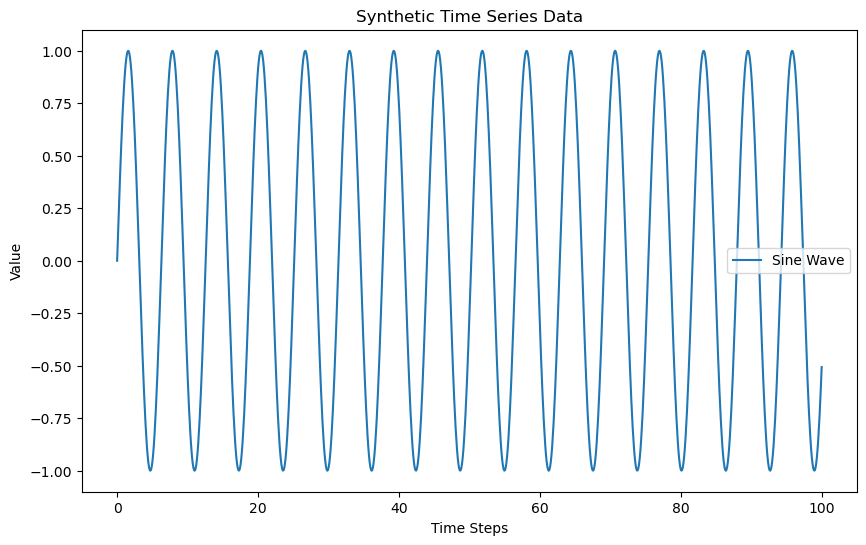

In [ ]:
# Generate a sine wave
time_steps = np.linspace(0, 100, 1000)
data = np.sin(time_steps)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time_steps, data, label="Sine Wave", color="blue", linewidth=2)
plt.title("Synthetic Time Series Data", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

## 3. Prepare the Data

We will split the data into training and testing sets and scale it to the range [0, 1]. Scaling is important for neural networks as it helps in faster convergence during training.

### Steps:

1. Split the data into training (80%) and testing (20%) sets.
2. Use `MinMaxScaler` to scale the data to the range [0, 1].

### Why Scaling?

Neural networks perform better when the input data is scaled to a smaller range, as it prevents large values from dominating the learning process.


In [ ]:
# Split the data
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1))
test_data = scaler.transform(test_data.reshape(-1, 1))

# Visualize the scaled data
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training Data", color="green", linewidth=2)
plt.plot(
    range(len(train_data), len(train_data) + len(test_data)),
    test_data,
    label="Testing Data",
    color="orange",
    linewidth=2,
)
plt.title("Scaled Time Series Data", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Scaled Value", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

## 4. Create Sequences

We will create sequences of data to be used as input for the LSTM model. Each sequence will have a fixed length, and the corresponding target value will be the next value in the series.

### Why Sequences?

LSTMs require input data in the form of sequences to learn temporal patterns.


In [ ]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


sequence_length = 50
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Print shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

## 5. Build the LSTM Model

We will define a simple LSTM model for time series forecasting.

### Model Architecture:

1. Two LSTM layers to capture temporal patterns.
2. A Dense layer to output the final prediction.


In [ ]:
# Build the model
model = Sequential(
    [
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, return_sequences=False),
        Dense(1),
    ]
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Print the model summary
model.summary()

c:\Users\super\miniconda3\envs\pyt12\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Train the Model

We will train the model using the training data.

### Training Details:

- Epochs: 20
- Batch Size: 32
- Validation Data: Testing set


In [6]:
# Train the model
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1604 - val_loss: 0.0312
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0169 - val_loss: 8.9573e-04
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0010 - val_loss: 2.6175e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.6212e-04 - val_loss: 4.3803e-05
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2693e-05 - val_loss: 2.1541e-05
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.1811e-05 - val_loss: 1.4653e-05
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9249e-05 - val_loss: 1.4238e-05
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4896e-05 - val_loss: 1.6557e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4828e-05 - val_loss: 1.5358e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4219e-05 - val_loss: 1.1998e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.3295e-05 - val_loss: 1.

## 7. Evaluate the Model

We will evaluate the model's performance on the test data.

### Evaluation Metric:

The model's performance is measured using Mean Squared Error (MSE).


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")

Test Loss: 0.0000


## 8. Make Predictions

We will use the trained model to make predictions on the test data.

### Visualization:

The predictions will be compared with the true values to assess the model's accuracy.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


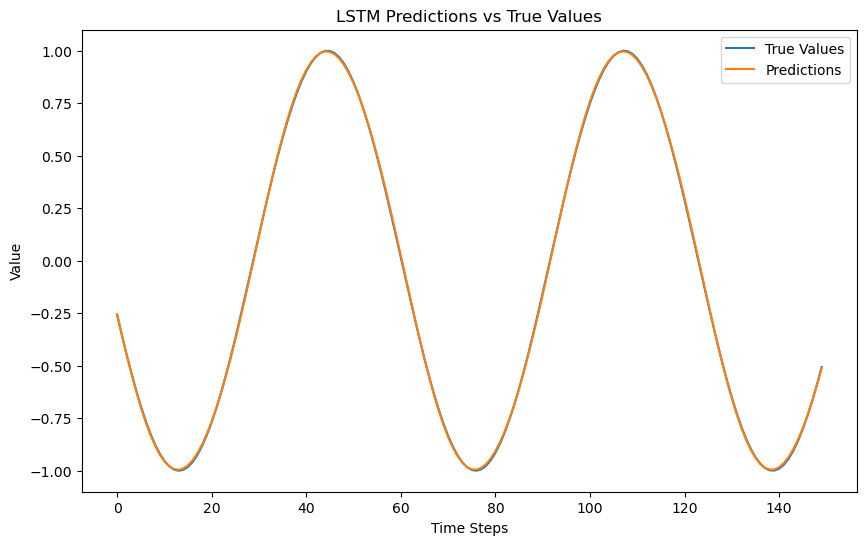

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True Values", color="blue", linewidth=2)
plt.plot(predictions, label="Predictions", color="red", linestyle="--", linewidth=2)
plt.title("LSTM Predictions vs True Values", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## 9. Conclusion

This notebook demonstrated how to use LSTMs for time series forecasting. The model was trained on a synthetic sine wave dataset and successfully predicted future values.

### Key Takeaways:

1. LSTMs are effective for capturing temporal patterns in sequential data.
2. Proper data preprocessing, such as scaling and sequence creation, is crucial for model performance.
3. Visualization helps in understanding the model's predictions and identifying areas for improvement.
